# Decision Tree

In [17]:
import pandas as pd 

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn import tree 

from matplotlib import pyplot as plt 

# Load Data

In [2]:
df = pd.read_csv("./data/immun.csv")
df.head()

,age,sickness,city,immun
0,old,yes,Aachen,low
1,old,no,Aachen,low
2,old,no,Aachen,low
3,mid,yes,Berlin,low
4,mid,yes,Berlin,low


# Split Data into Input and Output

In [3]:
# Input
df_inputs = df.drop("immun", axis = "columns")
df_inputs.head()

,age,sickness,city
0,old,yes,Aachen
1,old,no,Aachen
2,old,no,Aachen
3,mid,yes,Berlin
4,mid,yes,Berlin


In [4]:
# Output
target = df[["immun"]]
target.head()

,immun
0,low
1,low
2,low
3,low
4,low


# Convert the Strings to Numbers 
(using LabelEncoder)

In [5]:
# create instances for each string column
le_age = LabelEncoder()
le_sickness = LabelEncoder()
le_city = LabelEncoder()
le_immun = LabelEncoder()


df_inputs["age"]  =  le_age.fit_transform(df_inputs["age"])
df_inputs["sickness"]  =  le_sickness.fit_transform(df_inputs["sickness"])
df_inputs["city"]  =  le_city.fit_transform(df_inputs["city"])

target["immun"]  =  le_immun.fit_transform(target["immun"])


C:\Users\M\AppData\Local\Temp\ipykernel_7292\2419092258.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target["immun"]  =  le_immun.fit_transform(target["immun"])


In [7]:
le_age.classes_

array(['mid', 'new', 'old'], dtype=object)

In [8]:
# See the classes for each encoder
encoders = [le_age, le_sickness, le_city, le_immun]
 

for encoder in encoders:
    
    encoding= {}

    for i in list(encoder.classes_):
        encoding[i] = encoder.transform([i])[0]
        
    print(encoding)


{'mid': 0, 'new': 1, 'old': 2}
{'no': 0, 'yes': 1}
{'Aachen': 0, 'Berlin': 1, 'Frankfurt': 2}
{'high': 0, 'low': 1}


In [9]:
df_inputs.head()

,age,sickness,city
0,2,1,0
1,2,0,0
2,2,0,0
3,0,1,1
4,0,1,1


# Build and Train the model

escaped splitting data into train and test

In [10]:
# create model instance 
model = DecisionTreeClassifier() 

# Train the model 
model.fit(df_inputs, target)

DecisionTreeClassifier()

# Scoring

In [11]:
model.score(df_inputs, target)

1.0

# Predictions

In [12]:
age = 2 # "old"
sickness = 1# "yes"
city = 1# "Berlin"


# convert theinputs to numbers


model.predict([[age, sickness, city]]) # 1: low immun

c:\Python\Python3114\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

# Read the Tree information

In [16]:
print(model.classes_) # [0, 1]
print(model.feature_names_in_) # ['age' 'sickness' 'city']
print(model.get_depth()) # 3
print(model.get_n_leaves())

[0 1]
['age' 'sickness' 'city']
3
4


# Visualize the tree

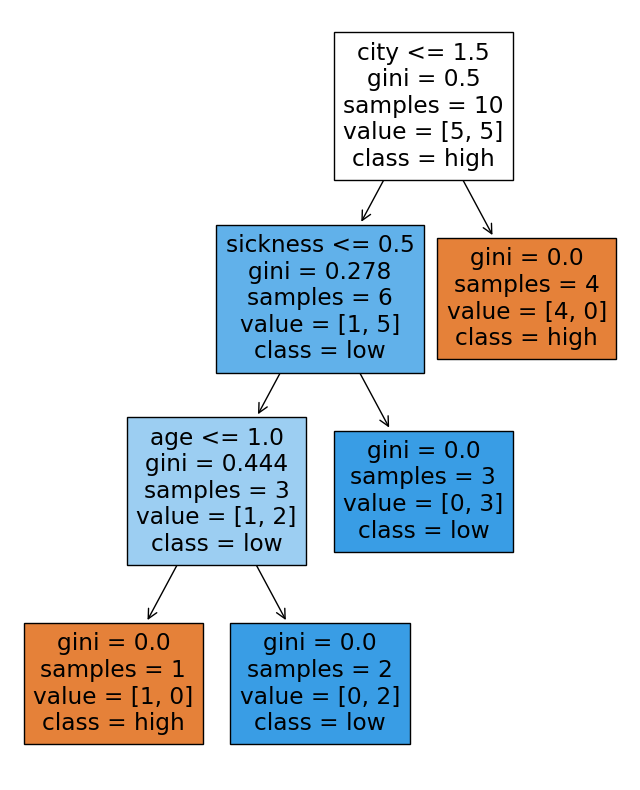

In [20]:
target = le_immun.classes_

fig = plt.figure(figsize=(8,10))

_ = tree.plot_tree(
    model,
    feature_names= model.feature_names_in_,
    class_names= target,
    filled= True
)


fig.savefig("./decisiontree.png")